In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_pickle("../data/02 Processed/balancedData.pkl")

In [7]:
# Data enrichment
df.drop(columns=["usage"], inplace=True, errors="ignore")
images = df.pixels.str.split().explode().astype(int).values.reshape(-1,48,48)

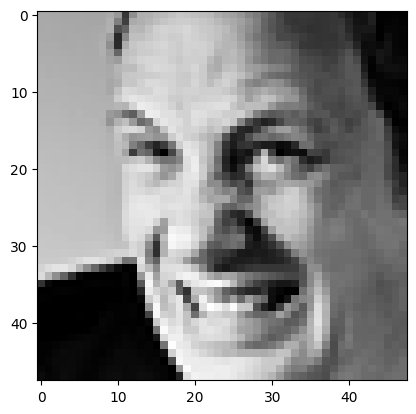

In [10]:
import matplotlib.pyplot as plt
testImage = images[0]
plt.imshow(testImage, cmap="gray")

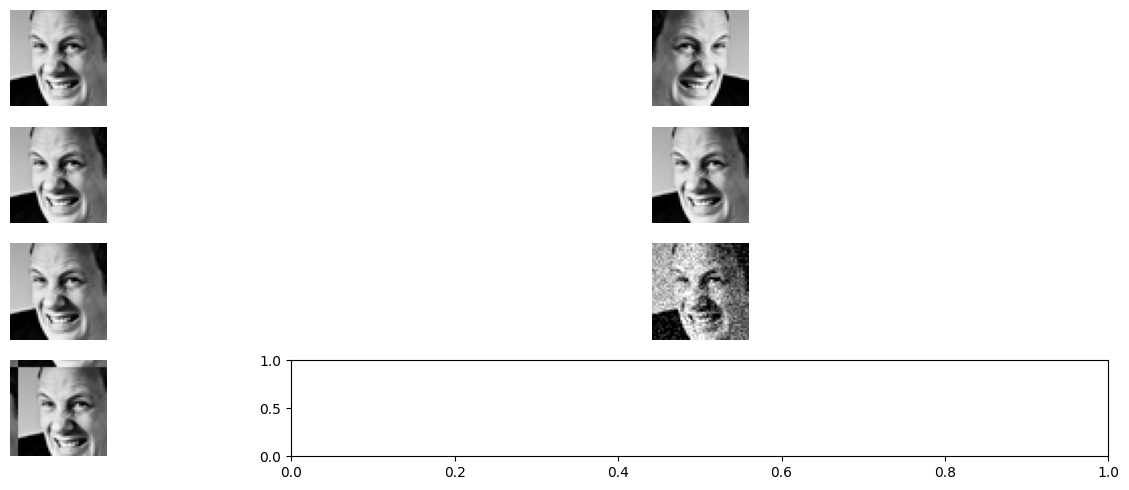

In [ ]:
def horizontal_flip(image):
    return np.fliplr(image)
def random_rotation(image):
    angle = np.random.randint(0, 360)
    return np.rot90(image, k=angle//90)
def random_brightness(image):
    factor = np.random.uniform(0.5, 1.5)
    return np.clip(image * factor, 0, 255).astype(np.uint8)
def random_contrast(image):
    factor = np.random.uniform(0.5, 1.5)
    mean = np.mean(image)
    return np.clip((image - mean) * factor + mean, 0, 255).astype(np.uint8)
def random_noise(image):
    noise = np.random.normal(0, 25, image.shape)
    return np.clip(image + noise, 0, 255).astype(np.uint8)
def random_translation(image):
    tx = np.random.randint(-5, 6)
    ty = np.random.randint(-5, 6)
    return np.roll(np.roll(image, tx, axis=1), ty, axis=0)


# plt.imshow(horizontal_flip(testImage), cmap="gray")
# plt.imshow(random_rotation(testImage), cmap="gray")
# plt.imshow(random_brightness(testImage), cmap="gray")
# plt.imshow(random_contrast(testImage), cmap="gray")
# plt.imshow(random_noise(testImage), cmap="gray")
# plt.imshow(random_translation(testImage), cmap="gray")
# plt.imshow(random_zoom(testImage), cmap="gray")

plots = [
    testImage,
    horizontal_flip(testImage),
    random_rotation(testImage),
    random_brightness(testImage),
    random_contrast(testImage),
    random_noise(testImage),
    random_translation(testImage),
]
fig, axes = plt.subplots(4, 2, figsize=(15, 5))

for ax, img in zip(axes.flatten(), plots):
    ax.imshow(img, cmap="gray")
    ax.axis("off")
plt.tight_layout()
plt.show()


def augment_image(image:np.ndarray)-> np.ndarray:
    '''
    one 48x48 image is passed
    returns 10 augmented images

    shape of return will be (10, 48, 48). Goal is then to have overall shape as (len(df),10, 48, 48)
    Then it can be exploded and then flattend down to the string again
    '''
    augmented_images = []
    
    augmented_images.append(image)
    operations = [
        horizontal_flip,
        random_rotation,
        random_brightness,
        random_contrast,
        random_noise,
        random_translation,
    ]
    for operation in operations:
        augmented_images.append(operation(image))
    
    # Randomly select 3 images from the augmented images
    selection = np.random.choice(list(range(7)), 3, replace=False)
    for idx in selection:
        # randomly select a function from the list
        fn = np.random.choice(operations)
        augmented_images.append(fn(augmented_images[idx]))
    return np.array(augmented_images)




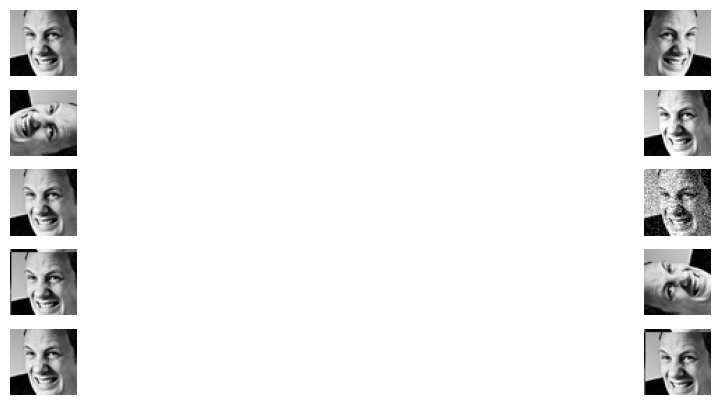

In [87]:
res = augment_image(testImage)


fig, axes = plt.subplots(5, 2, figsize=(15, 5))
for ax, img in zip(axes.flatten(), res):
    ax.imshow(img, cmap="gray")
    ax.axis("off")

In [ ]:
testShape = np.array([augment_image(img) for img in images[:3]]) 
# shape should be (3,10,48,48)
print(testShape.shape)

(3, 10, 48, 48)


In [ ]:
testDF = pd.DataFrame(data = dict(emotion = df.emotion[:3].values.tolist(), pixels = df.pixels[:3].values.tolist()))
augmentations = []
for augmentedBatch in testShape:
    res = ''
    for img in augmentedBatch:
        res += ' '.join(map(str, img.flatten())) + '\n'
    res = res.strip()
    augmentations.append(res)

testDF["augmentated_pixels"] = augmentations

(
    testDF
    .assign(augmentated_pixels = lambda s: s.augmentated_pixels.str.split("\n"))
    .explode("augmentated_pixels")
    
)

,emotion,pixels,augmentated_pixels
0,1,168 168 167 166 166 166 165 165 165 169 152 56...,168 168 167 166 166 166 165 165 165 169 152 56...
0,1,168 168 167 166 166 166 165 165 165 169 152 56...,1 3 2 2 32 19 16 29 43 55 53 52 55 56 55 57 70...
0,1,168 168 167 166 166 166 165 165 165 169 152 56...,1 2 4 3 3 5 10 13 9 3 4 9 12 7 2 5 13 10 6 8 1...
0,1,168 168 167 166 166 166 165 165 165 169 152 56...,87 87 86 86 86 86 85 85 85 87 79 29 74 91 92 9...
0,1,168 168 167 166 166 166 165 165 165 169 152 56...,154 154 154 153 153 153 152 152 152 155 144 79...
0,1,168 168 167 166 166 166 165 165 165 169 152 56...,151 167 151 169 140 149 152 166 139 159 157 45...
0,1,168 168 167 166 166 166 165 165 165 169 152 56...,4 7 8 9 8 5 3 3 5 7 6 3 5 0 116 253 234 230 21...
0,1,168 168 167 166 166 166 165 165 165 169 152 56...,2 4 5 5 5 3 1 1 3 4 3 1 3 0 76 166 153 150 139...
0,1,168 168 167 166 166 166 165 165 165 169 152 56...,168 168 167 166 166 166 165 165 165 169 152 56...
0,1,168 168 167 166 166 166 165 165 165 169 152 56...,178 158 106 156 163 164 147 164 101 159 162 52...


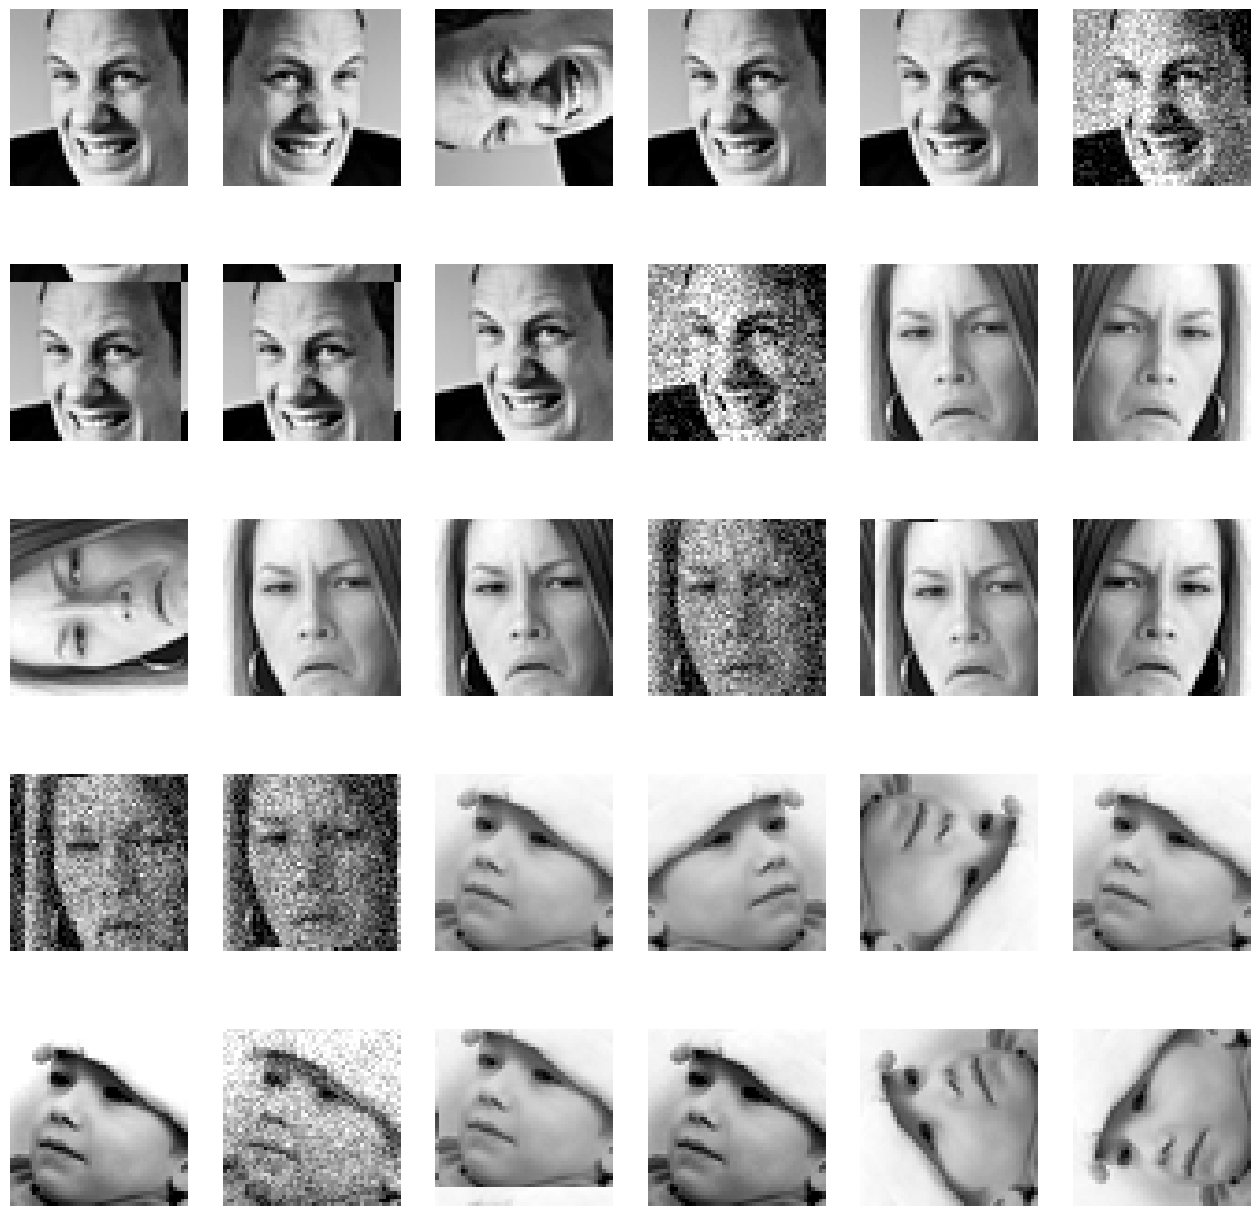

In [113]:

test_ims = (
    testDF
    .assign(augmentated_pixels = lambda s: s.augmentated_pixels.str.split("\n"))
    .explode("augmentated_pixels")
    .augmentated_pixels.str.split().explode().astype(int).values.reshape(-1,48,48) 
)

fig, axes = plt.subplots(5, 6, figsize=(16,16))
for ax, img in zip(axes.flatten(), test_ims):
    ax.imshow(img, cmap="gray")
    ax.axis("off")

In [ ]:
augmentedBatches = np.array([augment_image(img) for img in images]) 
print(augmentedBatches.shape) # shape should be (len(df),10,48,48)
augmentedImageStrings = []
for augmentedBatch in augmentedBatches:
    res = ''
    for img in augmentedBatch:
        res += ' '.join(map(str, img.flatten())) + '\n'
    res = res.strip()
    augmentedImageStrings.append(res)
    print("{}/{}".format(len(augmentedImageStrings), len(augmentedBatches)), end = '\r')

print(len(augmentedImageStrings))

df["augmentated_pixels"] = augmentedImageStrings

AugmentedDataFrame = (
    df
    .assign(augmentated_pixels = lambda s: s.augmentated_pixels.str.split("\n"))
    .explode("augmentated_pixels")
    # .reset_index(drop=True)
)

print(AugmentedDataFrame.shape)
print(df.shape)

AugmentedDataFrame = (
    AugmentedDataFrame
    .assign(pixels = AugmentedDataFrame.augmentated_pixels)
    .drop(columns = 'augmentated_pixels')
)

AugmentedDataFrame.to_pickle("../data/02 Processed/train.pkl")


(50337, 10, 48, 48)
50337/50337
(503370, 3)
(50337, 3)


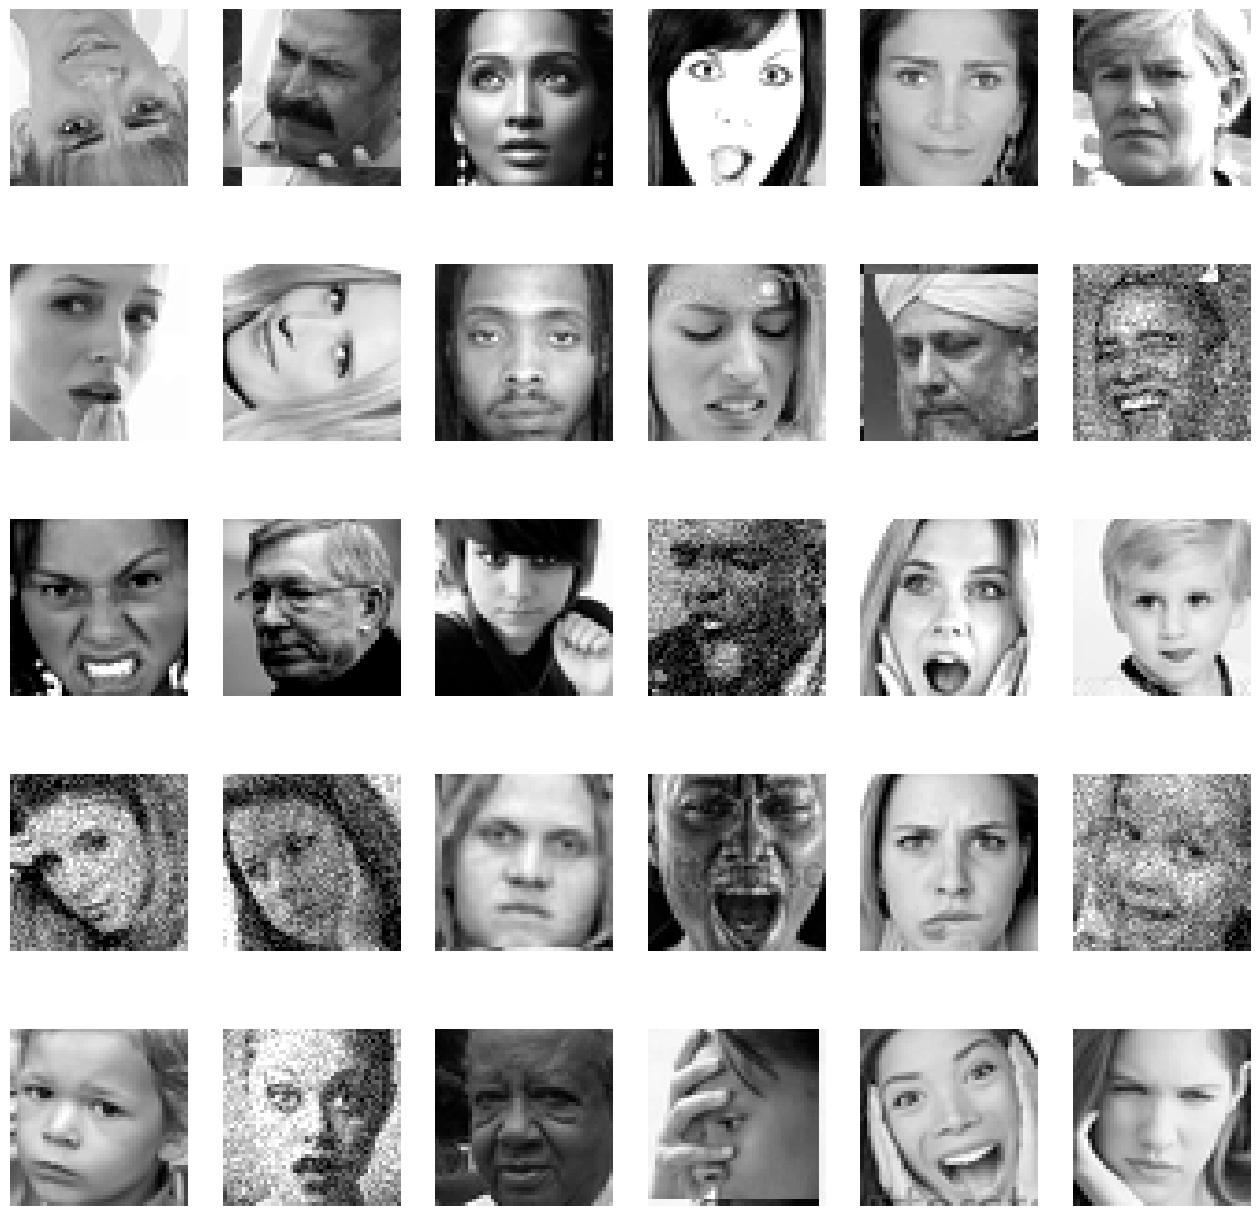

In [128]:
# Randomly select 30 images from AugmentedDataFrame
sample_images = (
    AugmentedDataFrame.reset_index(drop=True)
    .pipe(lambda s: s.loc[np.random.choice(s.index,30)])
    .augmentated_pixels
    .str.split().explode().astype(int).values.reshape(-1,48,48)   
)

fig, axes = plt.subplots(5, 6, figsize=(16,16))
for ax, img in zip(axes.flatten(), sample_images):
    ax.imshow(img, cmap="gray")
    ax.axis("off")